In [2]:
import numpy
import urllib.request
import scipy.optimize
import random
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
edges = set()
nodes = set()
for edge in urllib.request.urlopen("http://jmcauley.ucsd.edu/cse255/data/facebook/egonet.txt", data = None):
  x,y = edge.split()
  x,y = int(x),int(y)
  edges.add((x,y))
  edges.add((y,x))
  nodes.add(x)
  nodes.add(y)

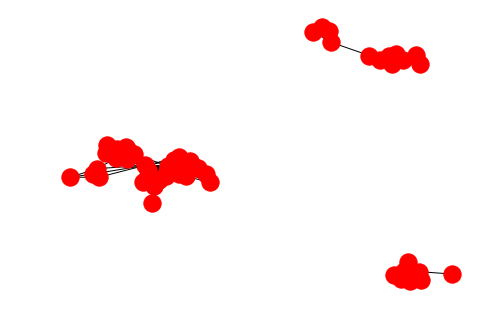

<Figure size 432x288 with 0 Axes>

In [4]:
G = nx.Graph()
for e in edges:
  G.add_edge(e[0],e[1])
nx.draw(G)
plt.show()
plt.clf()

In [5]:
# To find the largest connected component
index =0
for c in sorted (nx.connected_components(G), key=len, reverse=True):
    if index == 0:
        goal_cluster = c
        index = index + 1
        break

In [6]:
print (goal_cluster)
print (len(c))

{769, 772, 774, 798, 800, 803, 804, 805, 810, 811, 819, 823, 697, 825, 828, 830, 703, 708, 840, 713, 719, 856, 729, 861, 863, 864, 869, 745, 747, 876, 878, 880, 753, 882, 884, 886, 888, 889, 890, 893}
40


In [7]:
# Calculate the Normalized Cut cost
goal_cluster_list = list(goal_cluster)
goal_cluster_list.sort()
first_half = goal_cluster_list[:20]
second_half = goal_cluster_list[20:]
Degree_fir = sum([G.degree(v) for v in first_half])
Degree_sec = sum([G.degree(v) for v in second_half])
cut_edge = nx.cut_size(G, set(first_half), set(second_half))
Normalized_cut = (cut_edge/Degree_fir + cut_edge/Degree_sec)/2
print (Normalized_cut)

0.42240587695133147


In [7]:
print (first_half)

[697, 703, 708, 713, 719, 729, 745, 747, 753, 769, 772, 774, 798, 800, 803, 804, 805, 810, 811, 819]


In [8]:
print (second_half)

[823, 825, 828, 830, 840, 856, 861, 863, 864, 869, 876, 878, 880, 882, 884, 886, 888, 889, 890, 893]


In [11]:
def Compute_Normalized(G, l1, l2,node):
    first = [elem for elem in l1]
    second = [elem for elem in l2]
    first.append(node)
    second.remove(node)
    Degree_fir = sum([G.degree(v) for v in first])
    Degree_sec = sum([G.degree(v) for v in second])
    Numsofedge = nx.cut_size(G, set(first), set(second))
    return (Numsofedge/Degree_fir + Numsofedge/Degree_sec)/2

In [12]:
print (Compute_Normalized(G, second_half, first_half, 747))

0.4591003946362528


In [13]:
# Deploy the greedy algorithm
def FindSmallest(G, l1, l2):
    # each time we move node from second_half to first_half
    goal_node = 0
    cut_small = 100
    for elem in l2:
        temp_cut = Compute_Normalized(G, l1, l2, elem)
        if temp_cut < cut_small:
            cut_small = temp_cut
            goal_node = elem
    return str(cut_small)+"%"+str(goal_node)

In [14]:
FindSmallest(G, second_half, first_half)

'0.3873319662793347%729'

In [15]:
def stop():
    Degree_fir = sum([G.degree(v) for v in first_half])
    Degree_sec = sum([G.degree(v) for v in second_half])
    cut_edge = nx.cut_size(G, set(first_half), set(second_half))
    return (cut_edge/Degree_fir + cut_edge/Degree_sec)/2 

In [16]:
def GreedyProcess(G, first_half, second_half):
    res1 = FindSmallest(G, first_half, second_half)
    res2 = FindSmallest(G, second_half, first_half)
    if float(res1.split("%")[0]) < float(res2.split("%")[0]):
        first_half.append(int(res1.split("%")[1])) 
        second_half.remove(int(res1.split("%")[1]))
    else:
        second_half.append(int(res2.split("%")[1]))
        first_half.remove(int(res2.split("%")[1]))
    return stop()

In [17]:
acc = 1e-3
while 1:
    acc1 = GreedyProcess(G, first_half, second_half)
    acc2 = GreedyProcess(G, first_half, second_half)
    if abs(acc1 - acc2) > acc:
        continue
    else:
        print (acc2)
        break

KeyboardInterrupt: 

In [15]:
for i in range(100):
    acc1 = GreedyProcess(G, first_half, second_half)
print (acc1)

0.09817045961624274


In [16]:
print (first_half)

[697, 703, 708, 713, 719, 745, 747, 753, 769, 772, 774, 800, 803, 805, 810, 811, 819, 828, 823, 830, 840, 880, 890, 869, 856, 798]


In [17]:
print (second_half)

[825, 861, 863, 864, 876, 878, 882, 884, 886, 888, 889, 893, 729, 804]


In [18]:
# edges denotes the total set of edges in this graph
new_edge_set = set()
for i in range(len(edges)):
    unit_set = []
    if list(list(edges)[i])[0] in goal_cluster_list and list(list(edges)[i])[1] in goal_cluster_list:
        unit_set.append(list(list(edges)[i])[0])
        unit_set.append(list(list(edges)[i])[1])
        new_edge_set.add(tuple(unit_set))

In [19]:
def calculateModularity(G, first_half, second_half):
    first = [elem for elem in first_half]
    #first.append(node)
    second = [elem for elem in second_half]
    #second.remove(node)
    e11 = 0
    e22 = 0
    a1 = 0
    a2 = 0
    N = len(new_edge_set)
    for elem in list(new_edge_set):
        if list(elem)[0] in first:
            a1 = a1 + 1
            if list(elem)[1] in first:
                e11 = e11 + 1
        if list(elem)[0] in second:
            a2 = a2 + 1
            if list(elem)[1] in second:
                e22 = e22 + 1
    return e11/N - (a1/N)**2 + e22/N - (a2/N)**2

In [20]:
calculateModularity(G, first_half, second_half)

0.29544421487603306

In [20]:
def FindLargest(G, l1, l2):
    # each time we move node from second_half to first_half
    goal_node = 0
    G_Modularity = -2
    for elem in l2:
        temp_GM = calculateModularity(G, l1, l2, elem)
        if temp_GM > G_Modularity:
            G_Modularity = temp_GM
            goal_node = elem
    return str(G_Modularity)+"%"+str(goal_node)

In [21]:
def stop_new():
    e11 = 0
    e22 = 0
    a1 = 0
    a2 = 0
    N = len(new_edge_set)
    for elem in list(new_edge_set):
        if list(elem)[0] in first_half:
            a1 = a1 + 1
            if list(elem)[1] in first_half:
                e11 = e11 + 1
        if list(elem)[0] in second_half:
            a2 = a2 + 1
            if list(elem)[1] in second_half:
                e22 = e22 + 1
    return e11/N - (a1/N)**2 + e22/N - (a2/N)**2

In [22]:
def newGreedyProcess(G, first_half, second_half):
    res1 = FindLargest(G, first_half, second_half)
    res2 = FindLargest(G, second_half, first_half)
    if float(res1.split("%")[0]) > float(res2.split("%")[0]):
        first_half.append(int(res1.split("%")[1])) 
        second_half.remove(int(res1.split("%")[1]))
    else:
        second_half.append(int(res2.split("%")[1]))
        first_half.remove(int(res2.split("%")[1]))
    return stop_new()

In [25]:
for i in range(99):
    newGreedyProcess(G, first_half, second_half)
print (newGreedyProcess(G, first_half, second_half))

0.3326342975206613


In [26]:
print (first_half)

[697, 703, 708, 713, 719, 745, 747, 772, 774, 800, 803, 805, 810, 819, 828, 823, 830, 840, 880, 798]


In [27]:
print (second_half)

[825, 856, 861, 863, 864, 869, 876, 878, 882, 884, 886, 888, 889, 890, 893, 729, 804, 753, 811, 769]
